                  OVERVIEW

The main goal of this peroject is cllearly indicate which of the design and innovation spaces are available at a specific time.The DI hub is open to both students and community members. The space has multiple use; podcasting studio, 3D Scanning, XR- collaboratory,etc. However, it is always hard especially during school hours to know which of the spaces are free to use. The online booking system curerntly does not indicate that.  

For my data source, I use the online sign in form on the DI website. My data covers all log in details from January 2024 - March 2025. The dtails shows the equipment, start time, end time, locationof the equipment and the skill proficency needed to operate the equipments. 

Some of the limitations that i faced was the fact that most of the equipment login were repeated becauxe they were use several time over the one year 3 month period. Also, while working on the best way to visualized my data, i struggle a little with how best to show the data using different options. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import json
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv("DI Reservations new.csv")

In [3]:
df

,Equipment,Start Time,End Time,Proficiency skills,Location
0,3D Scanner,2024-02-05 10:00,2024-02-05 11:00,Beginner friendly,Frist floor
1,3D Scanner,2024-02-05 11:00,2024-02-05 12:00,Beginner friendly,Frist floor
2,3D Scanner,2024-02-05 12:00,2024-02-05 13:00,Beginner friendly,Frist floor
3,3D Scanner,2024-02-07 10:00,2024-02-07 11:00,Beginner friendly,Frist floor
4,3D Scanner,2024-03-13 13:00,2024-03-13 14:00,Beginner friendly,Frist floor
...,...,...,...,...,...
914,XR Workstation,2025-03-20 12:00,2025-03-20 13:00,Beginner friendly,second floor
915,XR_Collaboratory,2025-03-04 13:00,2025-03-04 14:00,Beginner friendly,second floor
916,XR_Collaboratory,2025-03-05 13:00,2025-03-05 14:00,Beginner friendly,second floor
917,XR_Collaboratory,2025-03-21 12:00,2025-03-21 13:00,Beginner friendly,second floor


In [4]:
df.shape

(919, 5)

In [5]:
df.columns

Index(['Equipment', 'Start Time', 'End Time', 'Proficiency skills',
       'Location'],
      dtype='object')

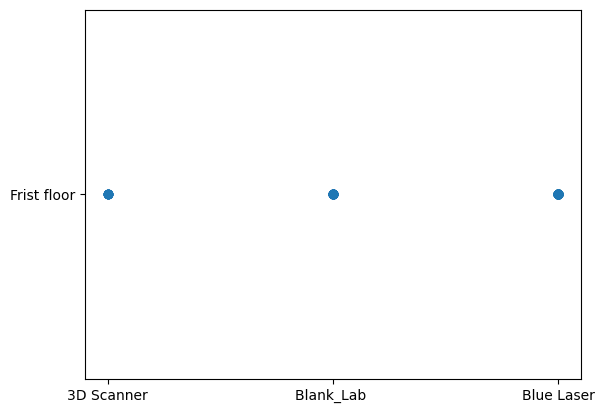

In [6]:
fig1, ax1 = plt.subplots()
ax1.scatter(x = df['Equipment'][0:100], y = df['Location'][0:100])
plt.show()

In [7]:
df['Equipment'][0]

'3D Scanner'

In [8]:
df['End-dt'] = pd.to_datetime(df['End Time'])
df['Start-dt'] = pd.to_datetime(df['Start Time'])

In [9]:
pd.to_datetime('2024-02-05')

Timestamp('2024-02-05 00:00:00')

In [10]:
df['End-dt']

0     2024-02-05 11:00:00
1     2024-02-05 12:00:00
2     2024-02-05 13:00:00
3     2024-02-07 11:00:00
4     2024-03-13 14:00:00
              ...        
914   2025-03-20 13:00:00
915   2025-03-04 14:00:00
916   2025-03-05 14:00:00
917   2025-03-21 13:00:00
918   2025-03-21 14:00:00
Name: End-dt, Length: 919, dtype: datetime64[ns]

In [11]:
df['Start-dt']

0     2024-02-05 10:00:00
1     2024-02-05 11:00:00
2     2024-02-05 12:00:00
3     2024-02-07 10:00:00
4     2024-03-13 13:00:00
              ...        
914   2025-03-20 12:00:00
915   2025-03-04 13:00:00
916   2025-03-05 13:00:00
917   2025-03-21 12:00:00
918   2025-03-21 13:00:00
Name: Start-dt, Length: 919, dtype: datetime64[ns]

In [12]:
df['Session Day'] = df['Start-dt'].dt.day_name()

In [13]:
df['End-dt'].dt.day_name()

0         Monday
1         Monday
2         Monday
3      Wednesday
4      Wednesday
         ...    
914     Thursday
915      Tuesday
916    Wednesday
917       Friday
918       Friday
Name: End-dt, Length: 919, dtype: object

In [14]:
agg = df.groupby(['Session Day', 'Equipment'])['Location'].count()

In [15]:
agg.index

MultiIndex([(   'Friday',              '3D Scanner'),
            (   'Friday',              'Blue Laser'),
            (   'Friday', 'Dye Sublimation Printer'),
            (   'Friday',      'Podcasting Studio '),
            (   'Friday',               'Red Laser'),
            (   'Friday',            'Spray Booth '),
            (   'Friday',            'Vinyl Cutter'),
            (   'Friday',          'WaterJet Shop '),
            (   'Friday',            'XR Console 1'),
            (   'Friday',            'XR Console 2'),
            (   'Friday',            'XR Console 3'),
            (   'Friday',        'XR_Collaboratory'),
            (   'Friday',       'XR_Collaboratory '),
            (   'Monday',              '3D Scanner'),
            (   'Monday',              'Blue Laser'),
            (   'Monday',                    'CNC '),
            (   'Monday', 'Dye Sublimation Printer'),
            (   'Monday',               'Red Laser'),
            (   'Monday',   

In [13]:
#df['Session-len'] = df['End-dt']-df['Start-dt']


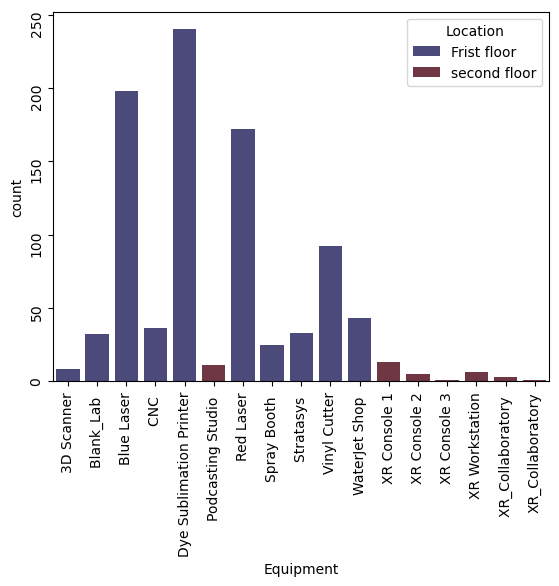

In [16]:
fig1, ax1 = plt.subplots()
ax1 = sns.countplot(data=df, x="Equipment", palette= "icefire", hue= "Location")
ax1.tick_params(rotation = 90)
plt.show()

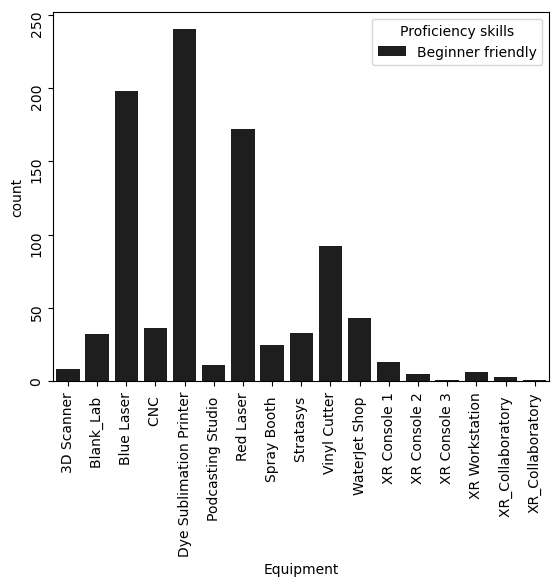

In [17]:
fig2, ax2 = plt.subplots()
ax2 = sns.countplot(data=df, x="Equipment", palette= "icefire", hue= "Proficiency skills")
ax2.tick_params(rotation = 90)
plt.show()

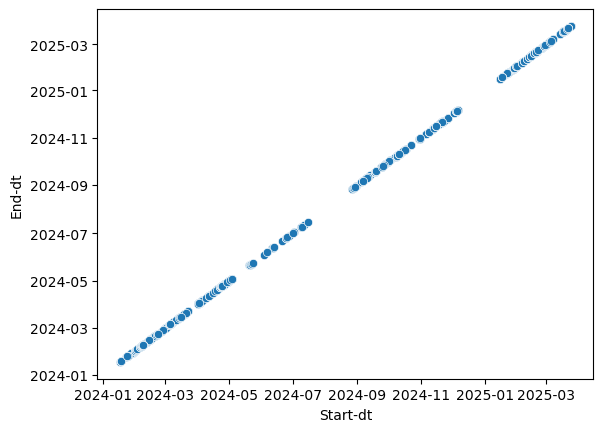

In [18]:
fig3, ax3 = plt.subplots()
ax3 = sns.scatterplot(data=df, x="Start-dt", y = "End-dt")
#ax3.tick_params(rotation = 90)
plt.show()

In [19]:
df['day_of_week'] = df['Start-dt'].dt.day_name()

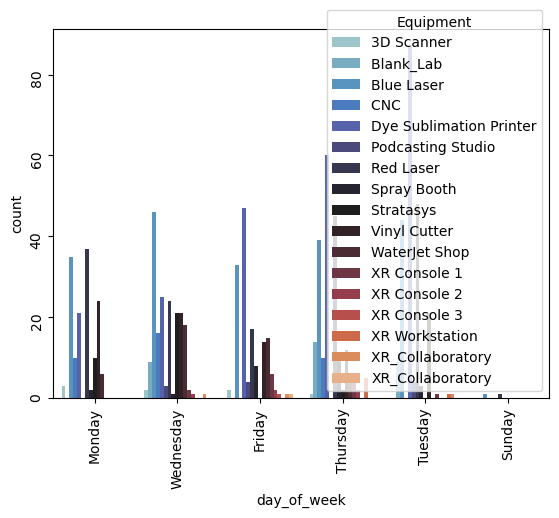

In [20]:
fig4, ax4 = plt.subplots()
ax4 = sns.countplot(data=df, x="day_of_week", palette= "icefire", hue= "Equipment")
ax4.tick_params(rotation = 90)
plt.show()

In [21]:
heatmap_data = df.pivot_table(
    index='Session Day',
    columns='Equipment',
    values='Location',
    aggfunc='count', sort = False
)
heatmap_data

Equipment,3D Scanner,Blank_Lab,Blue Laser,CNC,Dye Sublimation Printer,Podcasting Studio,Red Laser,Spray Booth,Stratasys,Vinyl Cutter,WaterJet Shop,XR Console 1,XR Console 2,XR Console 3,XR Workstation,XR_Collaboratory,XR_Collaboratory
Session Day,,,,,,,,,,,,,,,,,
Monday,3.0,NaN,35.0,10.0,21.0,NaN,37.0,2.0,10.0,24.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
Wednesday,2.0,9.0,46.0,16.0,25.0,3.0,24.0,1.0,21.0,21.0,18.0,2.0,1.0,NaN,NaN,1.0,NaN
Friday,2.0,NaN,33.0,NaN,47.0,4.0,17.0,8.0,NaN,14.0,15.0,6.0,2.0,1.0,NaN,1.0,1.0
Thursday,1.0,14.0,39.0,10.0,60.0,NaN,45.0,11.0,2.0,12.0,4.0,4.0,2.0,NaN,5.0,NaN,NaN
Tuesday,NaN,9.0,44.0,NaN,87.0,4.0,48.0,3.0,NaN,21.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN
Sunday,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


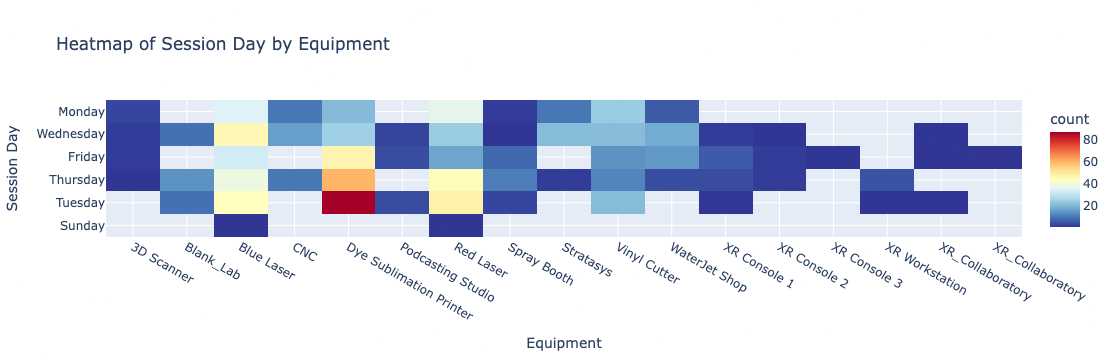

In [23]:
#time_stamp = ['Start-dt', 'End-dt']

# df_selected = df[df['Country'].isin(selected_countries)]

fig_heatmap = px.imshow(
    heatmap_data,
    labels=dict(x="Equipment", y="Session Day", color="count"),
    color_continuous_scale='RdYlBu_r', 
    title='Heatmap of Session Day by Equipment',
    aspect="auto"
    
)

fig_heatmap.update_layout(
    # title_x=0.5,
    xaxis_title="Equipment",
    yaxis_title="Session Day"
)

fig_heatmap.show()

In [30]:
heatmap_data = df.pivot_table(
    index='Equipment',
    columns='Proficiency skills',
    values='Location',
    aggfunc='count', sort = False
)
heatmap_data

Proficiency skills,Beginner friendly
Equipment,
3D Scanner,8
Blank_Lab,32
Blue Laser,198
CNC,36
Dye Sublimation Printer,240
Podcasting Studio,11
Red Laser,172
Spray Booth,25
Stratasys,33


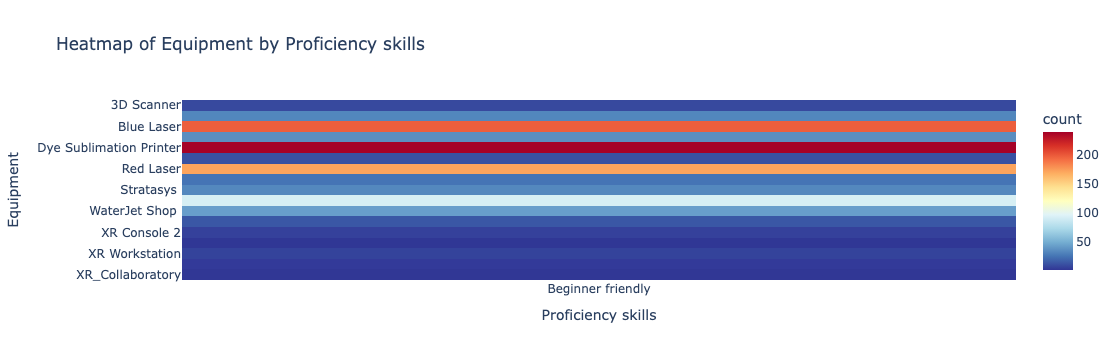

In [33]:
#df_selected = df[df['Country'].isin(selected_countries)]

fig2_heatmap = px.imshow(
    heatmap_data,
    labels=dict(x="Proficiency skills", y="Equipment", color="count"),
    color_continuous_scale='RdYlBu_r', 
    title='Heatmap of Equipment by Proficiency skills',
    aspect="auto"
    
)

fig2_heatmap.update_layout(
    # title_x=0.5,
    xaxis_title="Proficiency skills",
    yaxis_title="Equipment"
)

fig2_heatmap.show()

In [34]:
heatmap_data = df.pivot_table(
    index='Session Day',
    columns='Proficiency skills',
    values='Equipment',
    aggfunc='count', sort = False
)
heatmap_data

Proficiency skills,Beginner friendly
Session Day,
Monday,148
Wednesday,190
Friday,151
Thursday,209
Tuesday,219
Sunday,2


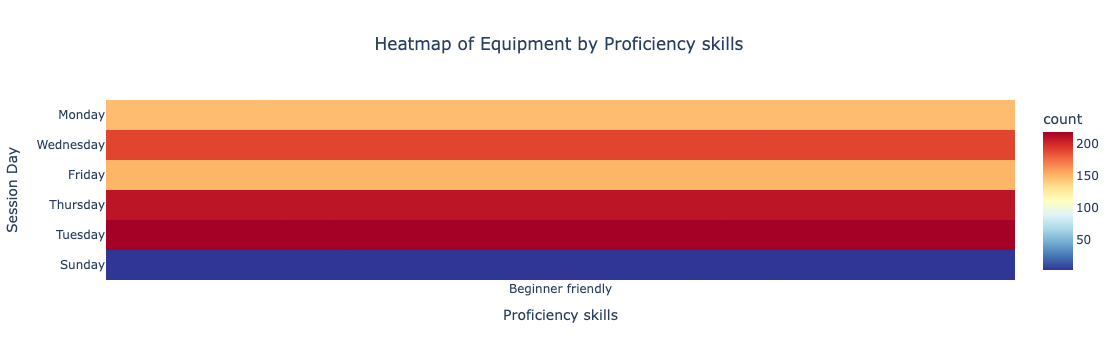

In [36]:
#df_selected = df[df['Country'].isin(selected_countries)]

fig3_heatmap = px.imshow(
    heatmap_data,
    labels=dict(x="Proficiency skills", y="Session Day", color="count"),
    color_continuous_scale='RdYlBu_r', 
    title='Heatmap of Equipment by Proficiency skills',
    aspect="auto"
    
)

fig3_heatmap.update_layout(
    title_x=0.5,
    xaxis_title="Proficiency skills",
    yaxis_title="Session Day"
)

fig3_heatmap.show()